# CrowdGuard Risk Assessment

This notebook analyzes the data generated by the `mock_stream.py` simulation. It loads the `log.csv` file and visualizes the calculated risk scores over time.

### 1. Setup

First, let's import the necessary libraries. We need `pandas` for data manipulation and `matplotlib` for plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

### 2. Load Risk Logs

Load the `log.csv` file into a pandas DataFrame. This file contains the per-cell metrics for each frame of the video.

In [2]:
log_file = 'log.csv'
try:
    df = pd.read_csv(log_file)
    print(f"Successfully loaded {log_file}. Found {len(df)} records.")
    print("Data preview:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: {log_file} not found. Please run mock_stream.py with the --csv argument first.")

Successfully loaded log.csv. Found 13299 records.
Data preview:
   frame_idx  time_s  cell_idx  density  acceleration  entropy  score
0          1    0.04         0      0.0           0.0      0.0  0.000
1          1    0.04         1      2.0           0.0      0.0  0.150
2          1    0.04         2      0.0           0.0      0.0  0.000
3          1    0.04         3      1.0           0.0      0.0  0.075
4          1    0.04         4      0.0           0.0      0.0  0.000


### 3. Analyze and Visualize Risk

To get a high-level overview of the risk, we can find the **maximum risk score** across all grid cells for each frame. This tells us the highest level of danger detected at any given moment in the video.

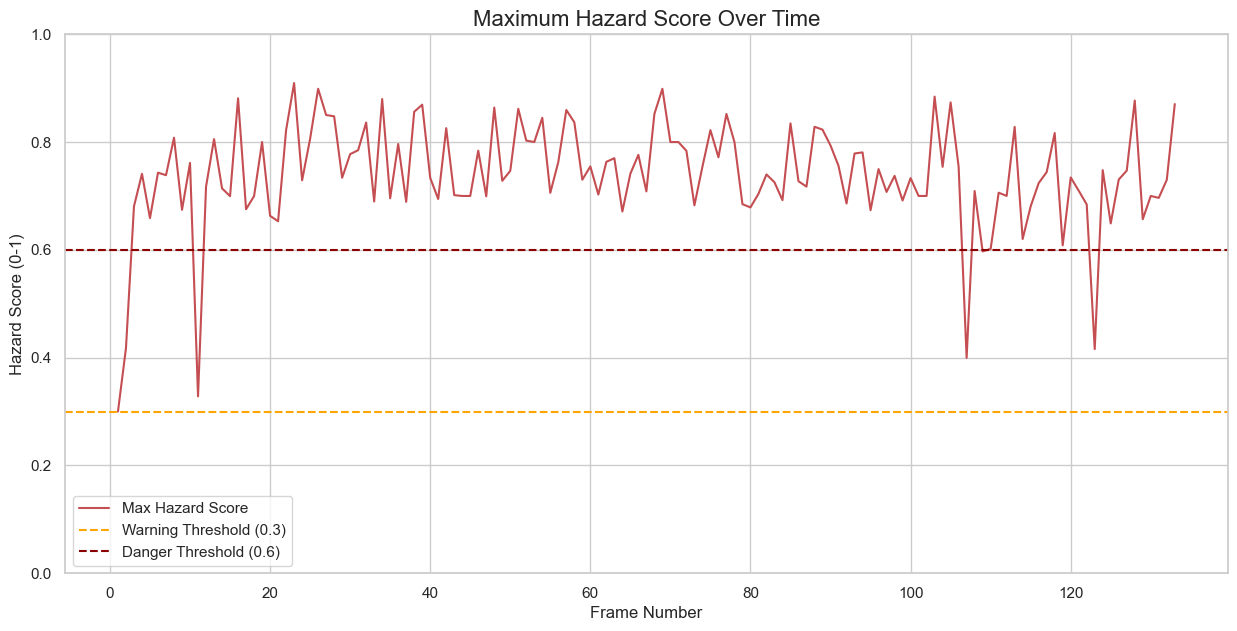

In [3]:
# Group by frame and find the maximum score for each frame
max_risk_per_frame = df.groupby('frame_idx')['score'].max()

# Create the Risk Graph
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=max_risk_per_frame.index, y=max_risk_per_frame.values, color='r', label='Max Hazard Score')

# Add threshold lines for different risk levels
ax.axhline(0.3, ls='--', color='orange', label='Warning Threshold (0.3)')
ax.axhline(0.6, ls='--', color='darkred', label='Danger Threshold (0.6)')

ax.set_title('Maximum Hazard Score Over Time', fontsize=16)
ax.set_xlabel('Frame Number')
ax.set_ylabel('Hazard Score (0-1)')
ax.legend()
ax.set_ylim(0, 1)
plt.show()

This graph clearly shows the moments in the video where the hazard score peaked, allowing you to quickly identify and investigate the most critical events.